In [2]:
# Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Cargar la base de datos
df = pd.read_csv("COVID19MEXICO.csv")

# Mostrar info general del dataset
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
display(df.head())

print("\nInformación de columnas:")
print(df.info())


Dimensiones del dataset: (99526, 42)

Primeras filas:


,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RESULTADO_PCR,RESULTADO_PCR_COINFECCION,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL_COVID,CLASIFICACION_FINAL_FLU,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2025-07-29,167f1a,1,12,1,2,1,1,3,1,...,997,997,2,97,6,6,99,México,97,97
1,2025-07-29,ga8a474,1,4,20,2,20,20,413,1,...,997,997,2,97,6,6,99,México,97,97
2,2025-07-29,gb733da,1,6,8,2,8,8,37,1,...,997,997,2,97,6,6,99,México,97,97
3,2025-07-29,g9ff7b3,1,4,32,1,32,32,17,2,...,5,5,2,97,7,7,99,México,97,2
4,2025-07-29,g90b5c8,1,6,10,1,10,10,5,2,...,5,5,2,97,7,7,99,México,97,2



Información de columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99526 entries, 0 to 99525
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   FECHA_ACTUALIZACION        99526 non-null  object
 1   ID_REGISTRO                99526 non-null  object
 2   ORIGEN                     99526 non-null  int64 
 3   SECTOR                     99526 non-null  int64 
 4   ENTIDAD_UM                 99526 non-null  int64 
 5   SEXO                       99526 non-null  int64 
 6   ENTIDAD_NAC                99526 non-null  int64 
 7   ENTIDAD_RES                99526 non-null  int64 
 8   MUNICIPIO_RES              99526 non-null  int64 
 9   TIPO_PACIENTE              99526 non-null  int64 
 10  FECHA_INGRESO              99526 non-null  object
 11  FECHA_SINTOMAS             99526 non-null  object
 12  FECHA_DEF                  99526 non-null  object
 13  INTUBADO                   99526 no

In [ ]:
# Copiamos el DataFrame para no modificar el original
df_clean = df.copy()

# Lista de valores que representan datos faltantes
missing_codes = [97, 99, 997, 999, 9999, '97', '99', '997', '999', '9999', '9999-99-99']

# Reemplazar por NaN en todo el DataFrame
df_clean.replace(missing_codes, np.nan, inplace=True)

# Convertir fechas a tipo datetime
date_cols = ["FECHA_ACTUALIZACION", "FECHA_INGRESO", "FECHA_SINTOMAS", "FECHA_DEF"]
for col in date_cols:
    df_clean[col] = pd.to_datetime(df_clean[col], errors="coerce")

print("Valores limpios, muestra:")
display(df_clean.head())


Valores limpios, muestra:


,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RESULTADO_PCR,RESULTADO_PCR_COINFECCION,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL_COVID,CLASIFICACION_FINAL_FLU,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2025-07-29,167f1a,1,12,1,2,1.0,1,3.0,1,...,NaN,NaN,2,NaN,6,6,NaN,México,NaN,NaN
1,2025-07-29,ga8a474,1,4,20,2,20.0,20,413.0,1,...,NaN,NaN,2,NaN,6,6,NaN,México,NaN,NaN
2,2025-07-29,gb733da,1,6,8,2,8.0,8,37.0,1,...,NaN,NaN,2,NaN,6,6,NaN,México,NaN,NaN
3,2025-07-29,g9ff7b3,1,4,32,1,32.0,32,17.0,2,...,5.0,5.0,2,NaN,7,7,NaN,México,NaN,2.0
4,2025-07-29,g90b5c8,1,6,10,1,10.0,10,5.0,2,...,5.0,5.0,2,NaN,7,7,NaN,México,NaN,2.0


In [7]:
# Resumen de valores faltantes
missing_summary = df_clean.isna().sum().reset_index()
missing_summary.columns = ["Columna", "Valores_faltantes"]
missing_summary["Porcentaje"] = (missing_summary["Valores_faltantes"] / len(df_clean)) * 100

# Ordenar por porcentaje de faltantes
missing_summary = missing_summary.sort_values(by="Porcentaje", ascending=False)

display(missing_summary.head(20))  # Mostrar las 20 columnas con más faltantes


,Columna,Valores_faltantes,Porcentaje
35,RESULTADO_ANTIGENO,99526,100.000000
40,PAIS_ORIGEN,99420,99.893495
38,MIGRANTE,99123,99.595081
12,FECHA_DEF,95816,96.272331
13,INTUBADO,53994,54.251150
41,UCI,53994,54.251150
17,EMBARAZO,44100,44.310030
32,RESULTADO_PCR,35002,35.168700
33,RESULTADO_PCR_COINFECCION,35002,35.168700
18,HABLA_LENGUA_INDIG,3184,3.199164


Distribución de EDAD:
count    99434.000000
mean        36.384547
std         25.812940
min          0.000000
25%         13.000000
50%         34.000000
75%         56.000000
max        111.000000
Name: EDAD, dtype: float64

Conteo por SEXO:
SEXO
1    55426
2    44100
Name: count, dtype: int64

Conteo de comorbilidades:
DIABETES:
DIABETES
2     86245
1     13157
98      124
Name: count, dtype: int64

HIPERTENSION:
HIPERTENSION
2     83513
1     15928
98       85
Name: count, dtype: int64

OBESIDAD:
OBESIDAD
2     92706
1      6742
98       78
Name: count, dtype: int64

ASMA:
ASMA
2     95477
1      3916
98      133
Name: count, dtype: int64

INMUSUPR:
INMUSUPR
2     96282
1      3155
98       89
Name: count, dtype: int64

RENAL_CRONICA:
RENAL_CRONICA
2     95981
1      3458
98       87
Name: count, dtype: int64

TABAQUISMO:
TABAQUISMO
2     94928
1      4488
98      110
Name: count, dtype: int64

UCI:
UCI
NaN    53994
2.0    44070
1.0     1462
Name: count, dtype: int64

INTUBADO:
INTU

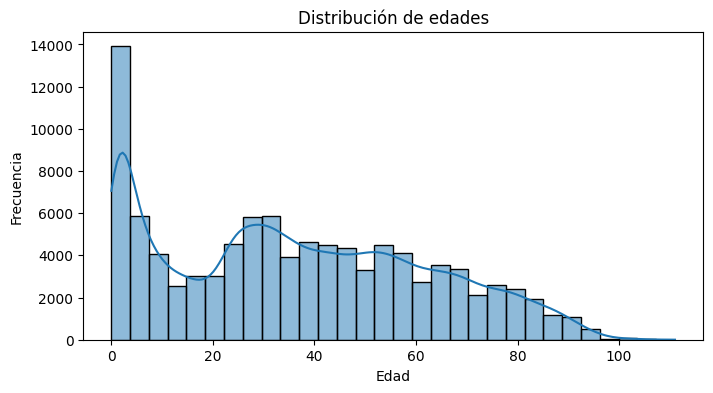


Total de fallecidos en el dataset: 3710


In [ ]:
# Variables clave a explorar
vars_clave = ["SEXO", "EDAD", "DIABETES", "HIPERTENSION", "OBESIDAD", "ASMA", 
              "INMUSUPR", "RENAL_CRONICA", "TABAQUISMO", "UCI", "INTUBADO", "FECHA_DEF"]

# Estadísticas
print("Distribución de EDAD:")
print(df_clean["EDAD"].describe())

print("\nConteo por SEXO:")
print(df_clean["SEXO"].value_counts(dropna=False))

print("\nConteo de comorbilidades:")
for col in vars_clave[2:-1]:  # solo comorbilidades
    print(f"{col}:\n{df_clean[col].value_counts(dropna=False)}\n")

# Visualización: distribución de edad
plt.figure(figsize=(8,4))
sns.histplot(df_clean["EDAD"].dropna(), bins=30, kde=True)
plt.title("Distribución de edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Conteo de fallecimientos
fallecidos = df_clean["FECHA_DEF"].notna().sum()
print(f"\nTotal de fallecidos en el dataset: {fallecidos}")
